In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Simple Linear Regression (Univariate)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [ ]:
data.corr(method="pearson")

,price,size
price,1.000000,0.862983
size,0.862983,1.000000


In [ ]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [ ]:
y = data["price"]
x1 = data["size"]
print(len(y), len(x1))

100 100


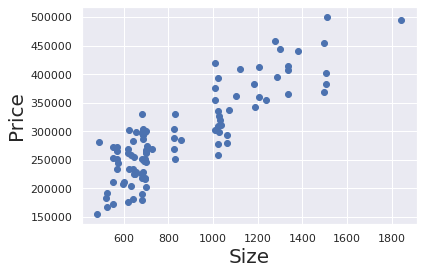

In [ ]:
plt.scatter(x1,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           8.13e-31
Time:                        09:51:46   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

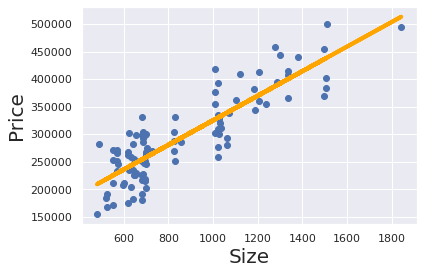

In [ ]:
plt.scatter(x1, y)
yhat =  x1*223.1787 + 101900
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.show()

In [ ]:
yhat = 1000 * 223.1787+101900
yhat

325078.69999999995

### Simple Linear Regression using sklearn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/bottle.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [ ]:
df_linear = df[['Salnty', 'T_degC']]
df_linear

,Salnty,T_degC
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


In [ ]:
df_linear.columns = ["Sal", "Temp"]
df_linear

,Sal,Temp
0,33.4400,10.500
1,33.4400,10.460
2,33.4370,10.460
3,33.4200,10.450
4,33.4210,10.450
...,...,...
864858,33.4083,18.744
864859,33.4083,18.744
864860,33.4150,18.692
864861,33.4062,18.161


In [ ]:
df_linear.head()

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


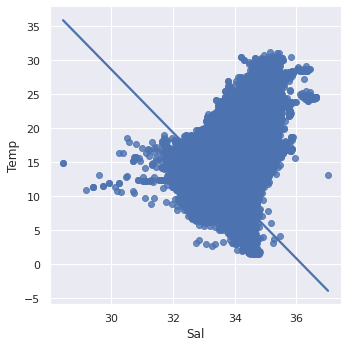

In [ ]:
sns.lmplot(x="Sal", y="Temp", data=df_linear,
           order=1, ci=None)

In [ ]:
df_linear.describe()

,Sal,Temp
count,817509.000000,853900.000000
mean,33.840350,10.799677
std,0.461843,4.243825
min,28.431000,1.440000
25%,33.488000,7.680000
50%,33.863000,10.060000
75%,34.196900,13.880000
max,37.034000,31.140000


In [ ]:
df_linear.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df_linear.describe()

,Sal,Temp
count,864863.000000,864863.000000
mean,31.987483,10.662780
std,7.711695,4.386508
min,0.000000,0.000000
25%,33.431000,7.570000
50%,33.806000,9.990000
75%,34.180000,13.830000
max,37.034000,31.140000


In [ ]:
df_linear.corr(method="pearson")

,Sal,Temp
Sal,1.000000,0.118658
Temp,0.118658,1.000000


In [ ]:
x = np.array(df_linear["Sal"]).reshape(-1, 1)

In [ ]:
y = np.array(df_linear["Temp"]).reshape(-1, 1)

In [ ]:
df_linear.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [ ]:
regr_model = LinearRegression()

In [ ]:
regr_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(regr_model.score(x_test, y_test))

0.0150334797000653


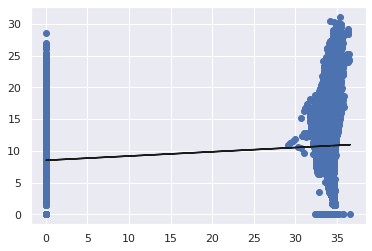

In [ ]:
y_pred = regr_model.predict(x_test)
plt.scatter(x_test, y_test, color="b")
plt.plot(x_test, y_pred, color="k")
plt.show()

### Multivariate Regression

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/real_estate_price_size_year.csv')

In [ ]:
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [ ]:
y = data["price"]
x1 = data[["size", "year"]]
size = data["size"]
year = data["year"]

In [ ]:
data.corr(method="pearson")

,price,size,year
price,1.000000,0.862983,0.093014
size,0.862983,1.000000,-0.097678
year,0.093014,-0.097678,1.000000


In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           2.77e-32
Time:                        04:39:33   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multivariate using sklearn

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
x = df.drop("Profit", axis=1)

In [ ]:
y = df["Profit"]

In [ ]:
states = pd.get_dummies(x, drop_first=True)

In [ ]:
x = states

In [ ]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction = LR.predict(x_test)

In [ ]:
y_prediction

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test, y_prediction)
mean_square_error = mean_squared_error(y_test, y_prediction)
root_mean_squared = np.sqrt(mean_squared_error(y_test, y_prediction))
score

0.8987266414328638

In [ ]:
mean_square_error

82010363.04430094

In [ ]:
root_mean_squared

9055.957323458462

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_regression(x, y)

(array([8.49788904e+02, 2.01495972e+00, 6.08814545e+01, 6.57495535e-01,
        4.72749794e-02]),
 array([3.50032224e-32, 1.62217395e-01, 4.38107318e-10, 4.21447913e-01,
        8.28796347e-01]))

In [ ]:
p_values = f_regression(x, y)[1]
p_values

array([3.50032224e-32, 1.62217395e-01, 4.38107318e-10, 4.21447913e-01,
       8.28796347e-01])

In [ ]:
p_values.round(3)

array([0.   , 0.162, 0.   , 0.421, 0.829])

In [ ]:
reg_summary = pd.DataFrame(data=x.columns.values, columns=["Featues"])
reg_summary["p-values"] = p_values.round(3)
reg_summary

,Featues,p-values
0,R&D Spend,0.000
1,Administration,0.162
2,Marketing Spend,0.000
3,State_Florida,0.421
4,State_New York,0.829


In [ ]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
x = x.drop("State_Florida", axis=1)

In [ ]:
x = x.drop("State_New York", axis=1)

In [ ]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction = LR.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test, y_prediction)
mean_square_error = mean_squared_error(y_test, y_prediction)
root_mean_squared = np.sqrt(mean_squared_error(y_test, y_prediction))
score

0.9000653083037321

In [ ]:
mean_square_error

80926321.22295153

In [ ]:
root_mean_squared

8995.905803361413

### Feature Scaling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/real_estate_price_size_year.csv')
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [ ]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [ ]:
x = data[["size", "year"]]
x = np.array(data["size"]).reshape(-1, 1)
y = data["price"]

In [ ]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
reg.score(x, y)

0.7447391865847586

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [ ]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [ ]:
reg.score(x_scaled, y)

0.7447391865847587

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [ ]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [ ]:
reg.score(x_scaled, y)

0.7447391865847587

In [ ]:
new_data = [[750]]
new_data_scaled = scaler.transform(new_data)

In [ ]:
reg.predict(new_data_scaled)

array([269296.65874718])

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_regression(x_scaled, y)

(array([285.92105192]), array([8.12763222e-31]))

In [ ]:
p_values = f_regression(x, y)[1]
p_values

array([8.12763222e-31])

In [ ]:
p_values.round(3)

array([0.])

### Polynomian Regression

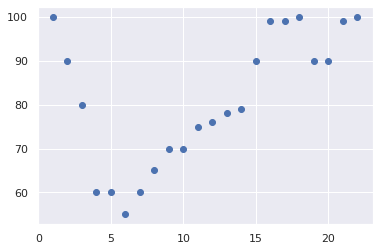

In [ ]:
import matplotlib.pyplot as plt
x = list(range(1, 23))
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90,
     99, 99, 100, 90, 90, 99, 100]
plt.scatter(x, y)
plt.show()

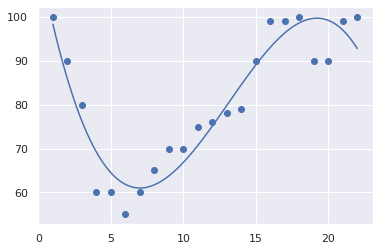

In [ ]:
mymodel = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(1, 22, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()